In [12]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pickle

import torch
import torch.nn as nn

In [35]:
y_train = np.load("../model/train_y.npy")
y_train_logits = np.load("../model/train_pred.npy")

y_test = np.load("../model/val_y.npy")
y_test_logits = np.load("../model/val_pred.npy")

In [18]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [23]:
sigmoid(y_train_pred[1])

0.007268844946365584

In [25]:
y_train_prob = sigmoid(y_train_logits)
y_test_prob = sigmoid(y_test_logits)

In [26]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score

In [32]:
def plot_roc_auc(y, y_score, train='Train'):
    fpr, tpr, thresholds = roc_curve(y, y_score)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    fig = px.area(
        x=fpr, y=tpr,
        title=f'{train} ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()
    
    return optimal_threshold

# Training Data Analysis

In [33]:
threshold = plot_roc_auc(y_train, y_train_prob)

In [34]:
threshold

0.5135079787994925

In [40]:
y_train_pred = np.where(y_train_prob>threshold, 1, 0)
y_test_pred = np.where(y_test_prob>threshold, 1, 0)

## Confusion Matrix

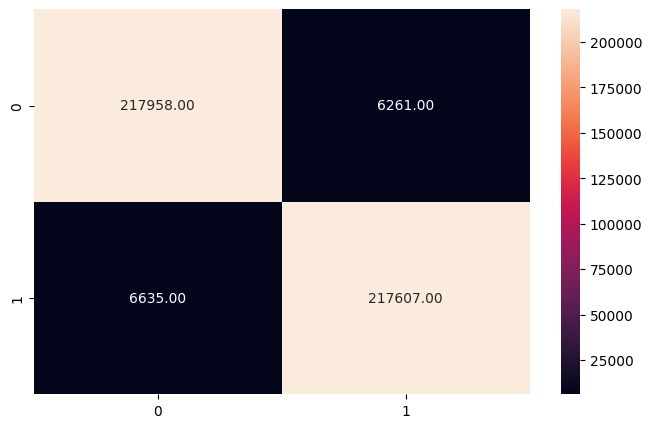

In [54]:
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='.2f')
plt.show()

## Classification Report

In [55]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    224219
         1.0       0.97      0.97      0.97    224242

    accuracy                           0.97    448461
   macro avg       0.97      0.97      0.97    448461
weighted avg       0.97      0.97      0.97    448461



# Test Data Analysis

In [56]:
plot_roc_auc(y_test, y_test_prob)

0.48360027997671273

## Confusion Matrix

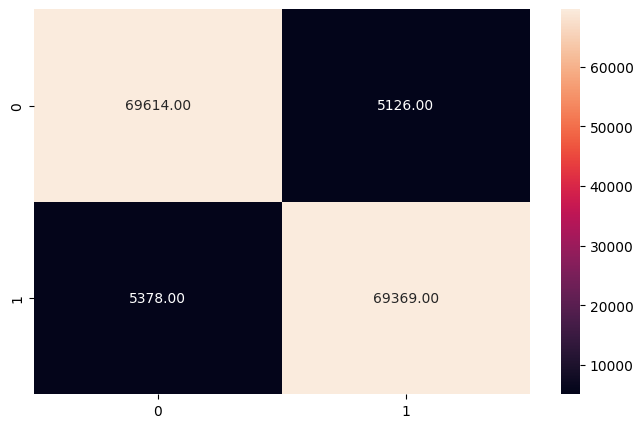

In [58]:
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.2f')
plt.show()

## Classification Report

In [59]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     74740
         1.0       0.93      0.93      0.93     74747

    accuracy                           0.93    149487
   macro avg       0.93      0.93      0.93    149487
weighted avg       0.93      0.93      0.93    149487

